# Black Holes: Key Quantities for Introductory Astronomy

This notebook introduces three essential concepts for understanding black holes at an undergraduate level: the **Schwarzschild radius** (how big is the "point of no return"), **tidal forces** near the event horizon (spaghettification), and **gravitational time dilation** (how time slows near the horizon). Each section includes the main equations, short explanations, and Python calculations with figures. You should have seen one year of calculus and calculus-based physics; we use only algebra and simple functions here, with LaTeX for the physics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Matplotlib settings: large, readable fonts
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
})

# Physical constants (SI)
G = 6.674e-11   # m^3 kg^-1 s^-2
c = 2.998e8     # m/s
M_sun = 1.989e30  # kg

---

## 1. The Schwarzschild Radius

In general relativity, a non-rotating, uncharged black hole is described by the **Schwarzschild solution**. The event horizon—the boundary from which nothing can escape—is a sphere of radius

$$R_s = \frac{2GM}{c^2}$$

where $G$ is Newton's gravitational constant, $M$ is the black hole mass, and $c$ is the speed of light. This is called the **Schwarzschild radius**. Notice that $R_s \propto M$: more massive black holes have larger event horizons. For a given mass, $R_s$ is the same regardless of how that mass was compressed to form the black hole. Below we compute $R_s$ as a function of mass in solar masses and compare it to the sizes of Solar System objects: asteroids for stellar-mass black holes (a few to tens of solar masses) and orbital radii for supermassive black holes (millions to billions of solar masses).

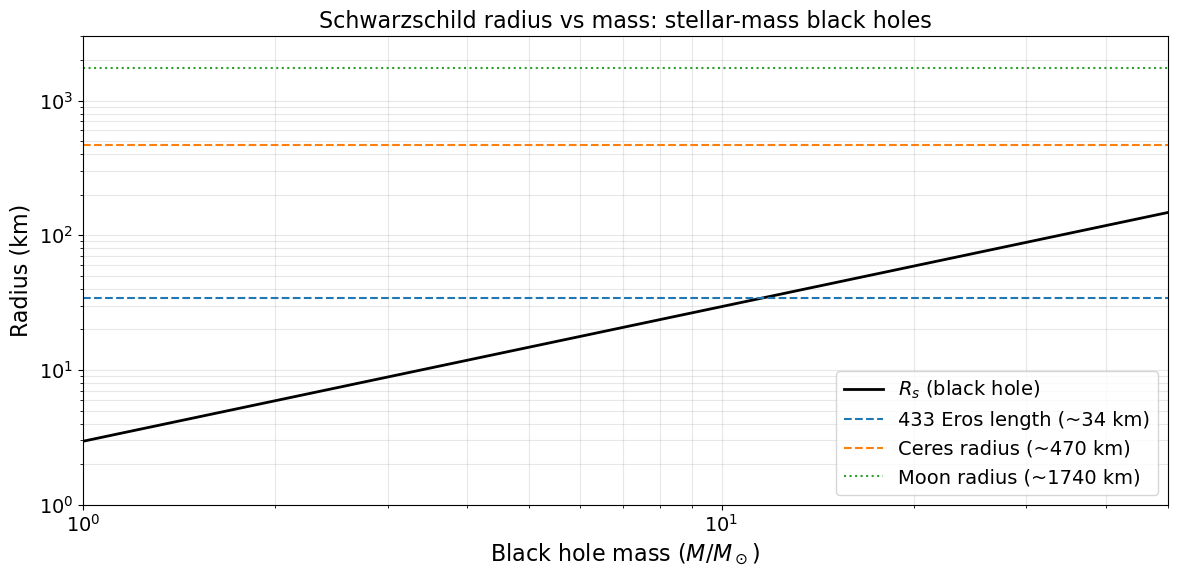

In [2]:
def schwarzschild_radius_km(M_Msun):
    """Schwarzschild radius in km for mass M in solar masses. R_s = 2 G M / c^2."""
    M_kg = M_Msun * M_sun
    R_s_m = 2 * G * M_kg / (c**2)
    return R_s_m / 1e3  # km

# Solar System reference sizes (km): useful for comparison
# Asteroid 433 Eros: semi-major axis of ~17 km, often quoted ~34 km length
EROS_SIZE_KM = 34
# Ceres mean radius
CERES_RADIUS_KM = 470
# Moon radius
MOON_RADIUS_KM = 1737
# Earth radius
EARTH_RADIUS_KM = 6371
# Orbital radii (semi-major axis) in km
AU_KM = 1.496e8
MERCURY_ORBIT_KM = 0.387 * AU_KM
VENUS_ORBIT_KM = 0.723 * AU_KM
EARTH_ORBIT_KM = AU_KM
MARS_ORBIT_KM = 1.52 * AU_KM
JUPITER_ORBIT_KM = 5.20 * AU_KM
SATURN_ORBIT_KM = 9.58 * AU_KM

# Stellar mass range: 1 to 50 M_sun
M_stellar = np.logspace(0, np.log10(50), 200)
R_s_stellar_km = schwarzschild_radius_km(M_stellar)

fig, ax = plt.subplots(figsize=(12, 6))
ax.loglog(M_stellar, R_s_stellar_km, 'k-', linewidth=2, label=r'$R_s$ (black hole)')
ax.axhline(EROS_SIZE_KM, color='C0', linestyle='--', linewidth=1.5, label='433 Eros length (~34 km)')
ax.axhline(CERES_RADIUS_KM, color='C1', linestyle='--', linewidth=1.5, label='Ceres radius (~470 km)')
ax.axhline(MOON_RADIUS_KM, color='C2', linestyle=':', linewidth=1.5, label='Moon radius (~1740 km)')
ax.set_xlabel(r'Black hole mass ($M/M_\odot$)')
ax.set_ylabel(r'Radius (km)')
ax.set_title('Schwarzschild radius vs mass: stellar-mass black holes')
ax.set_xlim(1, 50)
ax.set_ylim(1, 3e3)
ax.legend(loc='lower right')
ax.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.show()

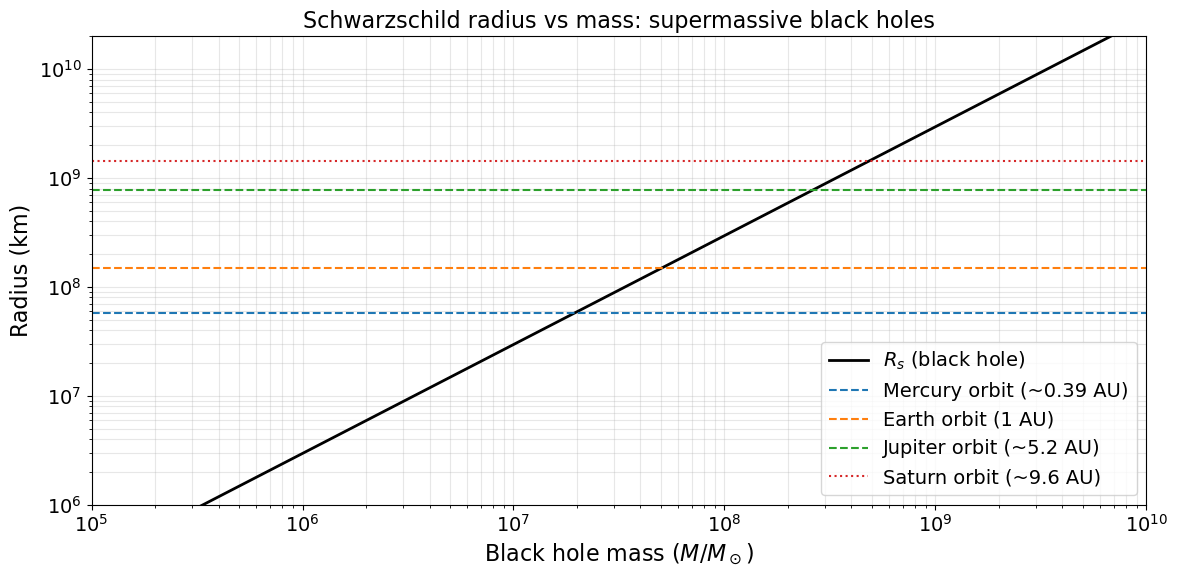

Schwarzschild radius benchmarks:
  M = 1e+00 M_sun  ->  R_s = 2.95e+00 km
  M = 1e+01 M_sun  ->  R_s = 2.95e+01 km
  M = 1e+06 M_sun  ->  R_s = 2.95e+06 km
  M = 1e+09 M_sun  ->  R_s = 2.95e+09 km


In [3]:
# Supermassive range: 1e5 to 1e10 M_sun; R_s in km for comparison to orbits
M_super = np.logspace(5, 10, 200)
R_s_super_km = schwarzschild_radius_km(M_super)

fig, ax = plt.subplots(figsize=(12, 6))
ax.loglog(M_super, R_s_super_km, 'k-', linewidth=2, label=r'$R_s$ (black hole)')
ax.axhline(MERCURY_ORBIT_KM, color='C0', linestyle='--', linewidth=1.5, label='Mercury orbit (~0.39 AU)')
ax.axhline(EARTH_ORBIT_KM, color='C1', linestyle='--', linewidth=1.5, label='Earth orbit (1 AU)')
ax.axhline(JUPITER_ORBIT_KM, color='C2', linestyle='--', linewidth=1.5, label='Jupiter orbit (~5.2 AU)')
ax.axhline(SATURN_ORBIT_KM, color='C3', linestyle=':', linewidth=1.5, label='Saturn orbit (~9.6 AU)')
ax.set_xlabel(r'Black hole mass ($M/M_\odot$)')
ax.set_ylabel(r'Radius (km)')
ax.set_title('Schwarzschild radius vs mass: supermassive black holes')
ax.set_xlim(1e5, 1e10)
ax.set_ylim(1e6, 2e10)
ax.legend(loc='lower right')
ax.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.show()

# Print a few benchmark values
print('Schwarzschild radius benchmarks:')
for M in [1, 10, 1e6, 1e9]:
    R = schwarzschild_radius_km(M)
    print(f'  M = {M:.0e} M_sun  ->  R_s = {R:.2e} km')

---

## 2. Tidal Forces and Spaghettification

Because gravity weakens with distance ($F \propto 1/r^2$), the side of an extended object closer to the black hole is pulled harder than the far side. This *difference* in force—the **tidal force**—stretches the object along the line to the black hole and compresses it perpendicular to that line. The tidal acceleration across an object of length $L$ at distance $r$ is (in magnitude)

$$a_{\rm tidal} = \frac{2 G M}{r^3} \, L.$$

The factor $2GM/r^3$ is the tidal field strength. When $a_{\rm tidal}$ exceeds the acceleration that the material can withstand (from tensile strength or self-gravity), the object is torn apart. Setting $a_{\rm tidal} = a_{\rm crit}$ and solving for $r$ gives the **disruption distance** $r_d = (2 G M L / a_{\rm crit})^{1/3}$. In units of the Schwarzschild radius, $r_d/R_s$ depends on the black hole mass and the object's size and strength; more massive black holes have *smaller* $r_d/R_s$, so you can approach closer to a supermassive black hole before being tidally disrupted. Below we compute and plot $r_d/R_s$ for a piece of spaghetti, a comet, and a star.

In [ ]:
def R_s_meters(M_Msun):
    """Schwarzschild radius in meters."""
    return 2 * G * (M_Msun * M_sun) / (c**2)

def disruption_radius_Rs(M_Msun, L_m, a_crit_ms2):
    """
    Tidal disruption distance in units of R_s.
    Assumes disruption when a_tidal = 2 G M L / r^3 = a_crit => r = (2 G M L / a_crit)^(1/3).
    Returns r_d / R_s.
    """
    M_kg = M_Msun * M_sun
    r_d = (2 * G * M_kg * L_m / a_crit_ms2)**(1/3)
    R_s = R_s_meters(M_Msun)
    return r_d / R_s

# Object parameters: characteristic length L (m), critical acceleration a_crit (m/s^2)
# Spaghetti: ~25 cm, tensile strength ~20 MPa, density ~1000 kg/m^3 -> a_crit ~ stress/(rho*L)
SPAGHETTI_L = 0.25
SPAGHETTI_ACRIT = 8e4   # ~20 MPa / (1000 kg/m^3 * 0.25 m) order of magnitude
# Comet: size ~10 km, very weak (ice/dust), a_crit ~ 0.01–0.1 m/s^2
COMET_L = 10e3
COMET_ACRIT = 0.05
# Star (Sun-like): R ~ 7e8 m, disruption when self-gravity overcome; a_crit ~ G M_* / R_*^2
M_star_sun = 1
R_star_sun = 7e8  # m
A_CRIT_STAR = G * (M_star_sun * M_sun) / (R_star_sun**2)  # ~270 m/s^2
STAR_L = 2 * R_star_sun  # diameter

M_bh = np.logspace(-1, 10, 300)
r_spag = np.array([disruption_radius_Rs(M, SPAGHETTI_L, SPAGHETTI_ACRIT) for M in M_bh])
r_comet = np.array([disruption_radius_Rs(M, COMET_L, COMET_ACRIT) for M in M_bh])
r_star = np.array([disruption_radius_Rs(M, STAR_L, A_CRIT_STAR) for M in M_bh])

fig, ax = plt.subplots(figsize=(12, 6))
ax.loglog(M_bh, r_spag, 'b-', linewidth=2, label='Piece of spaghetti')
ax.loglog(M_bh, r_comet, 'g-', linewidth=2, label='Comet (weak ice)')
ax.loglog(M_bh, r_star, 'r-', linewidth=2, label='Sun-like star')
ax.set_xlabel(r'Black hole mass ($M/M_\odot$)')
ax.set_ylabel(r'Disruption distance ($r_d / R_s$)')
ax.set_title('Tidal disruption distance in units of Schwarzschild radius (spaghettification)')
ax.set_xlim(0.1, 1e10)
ax.set_ylim(1, 1e6)
ax.legend(loc='upper right')
ax.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.show()

# Print disruption distances for a few masses
print('Disruption distance r_d / R_s at selected masses:')
for M in [1, 10, 1e6]:
    print(f'  M = {M:.0e} M_sun:  spaghetti {disruption_radius_Rs(M, SPAGHETTI_L, SPAGHETTI_ACRIT):.1f} R_s,  '
          f'comet {disruption_radius_Rs(M, COMET_L, COMET_ACRIT):.0f} R_s,  '
          f'star {disruption_radius_Rs(M, STAR_L, A_CRIT_STAR):.1f} R_s')

---

## 3. Gravitational Redshift and Time Dilation

In general relativity, gravity slows time. For a stationary observer at radius $r$ outside a Schwarzschild black hole, the rate at which time passes relative to a distant observer (where gravity is negligible) is

$$\frac{d\tau}{dt} = \sqrt{1 - \frac{R_s}{r}}$$

where $\tau$ is proper time (the observer's own clock) and $t$ is coordinate time (the distant observer's clock). So one second at $r$ corresponds to $1/\sqrt{1 - R_s/r}$ seconds for the distant observer—time runs *slower* closer to the horizon. The **time dilation factor** (ratio of distant elapsed time to local elapsed time) is

$$\frac{\Delta t}{\Delta \tau} = \frac{1}{\sqrt{1 - R_s/r}}.$$

As $r \to R_s$, this factor diverges: a distant observer would see your clock effectively freeze as you approach the horizon. This is related to gravitational redshift: light climbing out of the gravity well loses energy and is redshifted by the same factor. Below we plot the time dilation factor from $r = 10\,R_s$ down to $r = 1.01\,R_s$, and compare with the (tiny) time dilation at the surfaces of Earth and the Sun.

In [ ]:
def time_dilation_factor(r_over_Rs):
    """Time dilation factor dt/dtau = 1/sqrt(1 - R_s/r) for r > R_s. Input: r/R_s."""
    r_over_Rs = np.atleast_1d(r_over_Rs).astype(float)
    # Avoid r <= R_s
    valid = r_over_Rs > 1.0
    out = np.full_like(r_over_Rs, np.nan)
    out[valid] = 1.0 / np.sqrt(1.0 - 1.0 / r_over_Rs[valid])
    return out

# Range from 10 R_s down to 1.01 R_s (use fine spacing near horizon)
r_Rs = np.linspace(10, 1.01, 500)
dilation = time_dilation_factor(r_Rs)

fig, ax = plt.subplots(figsize=(12, 6))
ax.semilogy(r_Rs, dilation, 'k-', linewidth=2)
ax.set_xlabel(r'Distance from horizon ($r / R_s$)')
ax.set_ylabel(r'Time dilation factor $\Delta t / \Delta \tau$')
ax.set_title('Gravitational time dilation near a black hole event horizon')
ax.set_xlim(10, 1.01)
ax.set_ylim(1, 1e3)
ax.invert_xaxis()
ax.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Time dilation at surface of Earth and Sun (for comparison)
# Earth: M = 5.97e24 kg, R = 6371 km
M_earth_kg = 5.972e24
R_earth_m = 6.371e6
R_s_earth = 2 * G * M_earth_kg / (c**2)
r_over_Rs_earth = R_earth_m / R_s_earth
dilation_earth = time_dilation_factor(r_over_Rs_earth)

# Sun: M_sun, R_sun = 696000 km
R_sun_m = 6.96e8
R_s_sun_m = 2 * G * M_sun / (c**2)
r_over_Rs_sun = R_sun_m / R_s_sun_m
dilation_sun = time_dilation_factor(r_over_Rs_sun)

print('Time dilation at surfaces (compared to far away):')
print(f'  Earth surface:  r/R_s = {r_over_Rs_earth:.2e},  Δt/Δτ = {float(dilation_earth):.6e}')
print(f'  Sun surface:    r/R_s = {r_over_Rs_sun:.2e},  Δt/Δτ = {float(dilation_sun):.6e}')
print('  (Both are very close to 1; black holes produce extreme time dilation only near the horizon.)')